In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [53]:
dY=pd.read_excel("InputCFREstimatess.xlsx")

print(dY.columns)

Index(['Country', 'CFR', 'Density', 'GDP', 'Number of Hospitals',
       'Beds per thousand people', 'Birth rate', 'Life expectancy',
       'Debt per Capita in US dollars',
       'Air Pollution (micro grams per cubic meter)', 'FCFR', 'CVD'],
      dtype='object')


In [ ]:
countries = pd.DataFrame(dY.Country)

In [ ]:
CFR = pd.DataFrame(dY.CFR)

In [3]:
country = dY[["Country"]]

In [4]:
CFRs = dY[["CFR"]]

In [54]:
CVDs = dY[["CVD"]]

In [50]:
FCFRs = dY[["FCFR"]]

In [5]:
Density = dY[["Density"]]

In [23]:
air_pollution = dY[["Air Pollution (micro grams per cubic meter)"]]

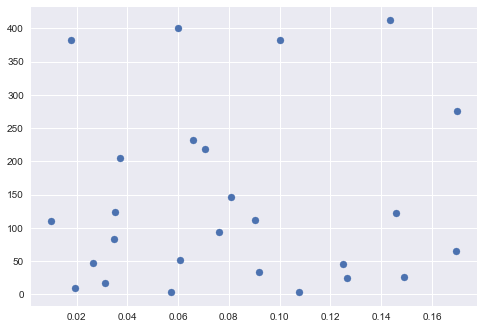

In [6]:
plt.scatter(CFRs, Density)
plt.show()

In [11]:
dataframe=pd.read_excel("InputCFREstimates.xlsx")

In [17]:
model = ols("CFRs ~ Density", dataframe).fit()
predictions = model.predict(Density) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CFRs   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.05629
Date:                Sun, 13 Jun 2021   Prob (F-statistic):              0.814
Time:                        13:43:00   Log-Likelihood:                 42.071
No. Observations:                  26   AIC:                            -80.14
Df Residuals:                      24   BIC:                            -77.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0784      0.014      5.465      0.0

In [18]:
anova_results = anova_lm(model)
#print('\nANOVA results')
print(anova_results)

            df    sum_sq   mean_sq         F    PR(>F)
Density    1.0  0.000140  0.000140  0.056287  0.814477
Residual  24.0  0.059846  0.002494       NaN       NaN


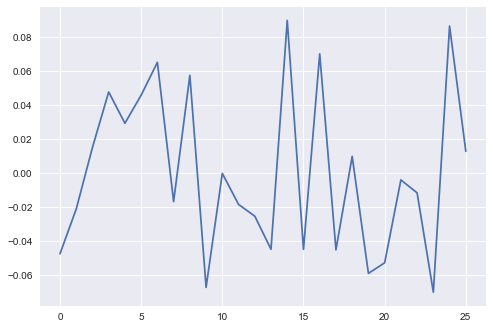

In [19]:
res=model.resid

plt.plot(res)

C:\Users\ezely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


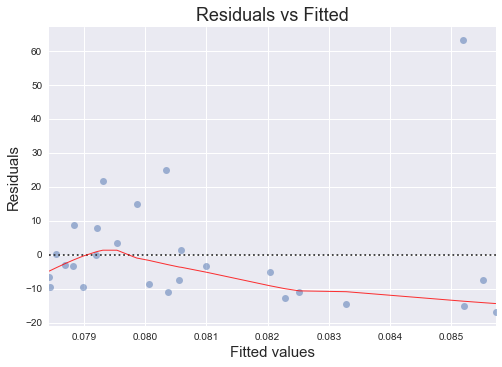

In [20]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

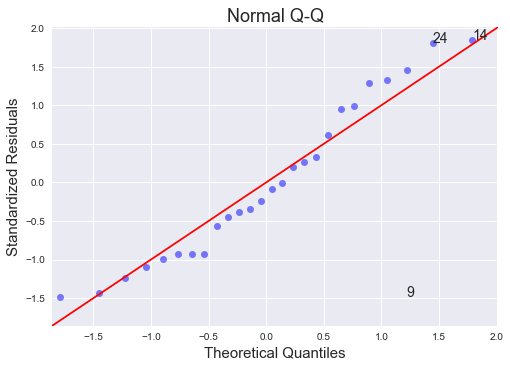

In [21]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [22]:
#Airpollution

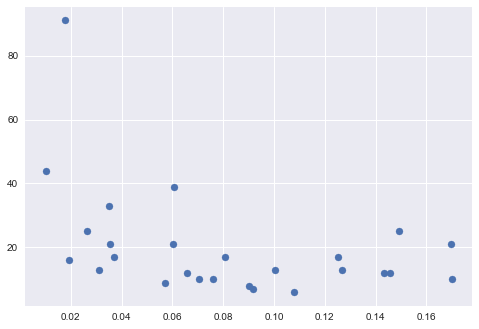

In [24]:
plt.scatter(CFRs, air_pollution)
plt.show()

In [31]:
model = ols("CFRs ~ air_pollution", dataframe).fit()
predictions = model.predict(air_pollution) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CFRs   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.168
Date:                Sun, 13 Jun 2021   Prob (F-statistic):             0.0322
Time:                        13:48:07   Log-Likelihood:                 44.575
No. Observations:                  26   AIC:                            -85.15
Df Residuals:                      24   BIC:                            -82.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1047      0.014      7.610

In [32]:
anova_results = anova_lm(model)
#print('\nANOVA results')
print(anova_results)

                 df    sum_sq   mean_sq         F   PR(>F)
air_pollution   1.0  0.010628  0.010628  5.167541  0.03225
Residual       24.0  0.049359  0.002057       NaN      NaN


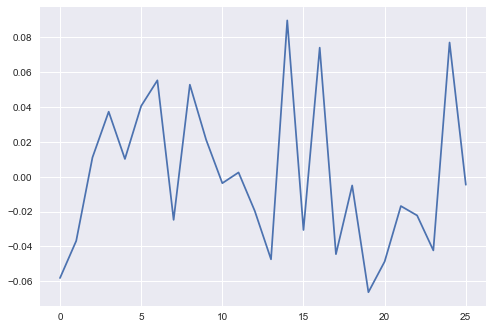

In [33]:
res=model.resid

plt.plot(res)

C:\Users\ezely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


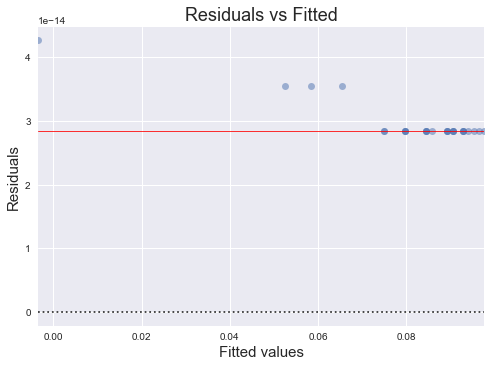

In [34]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

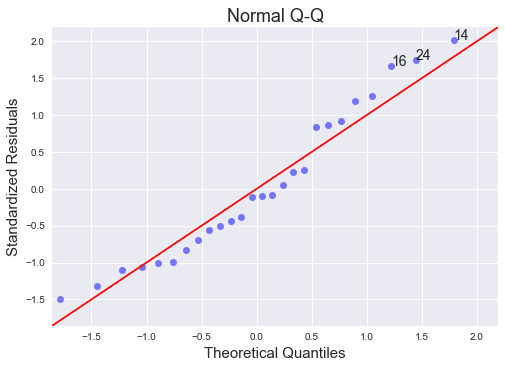

In [35]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
#life expectancy

In [36]:
life_exp = dY[["Life expectancy"]]

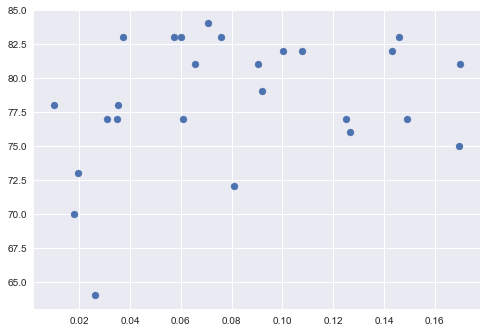

In [37]:
plt.scatter(CFRs, life_exp)
plt.show()

In [38]:
model = ols("CFRs ~ life_exp", dataframe).fit()
predictions = model.predict(life_exp) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CFRs   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.251
Date:                Sun, 13 Jun 2021   Prob (F-statistic):              0.147
Time:                        13:50:23   Log-Likelihood:                 43.206
No. Observations:                  26   AIC:                            -82.41
Df Residuals:                      24   BIC:                            -79.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1542      0.157     -0.982      0.3

In [39]:
anova_results = anova_lm(model)
#print('\nANOVA results')
print(anova_results)

            df    sum_sq   mean_sq         F   PR(>F)
life_exp   1.0  0.005144  0.005144  2.251233  0.14655
Residual  24.0  0.054842  0.002285       NaN      NaN


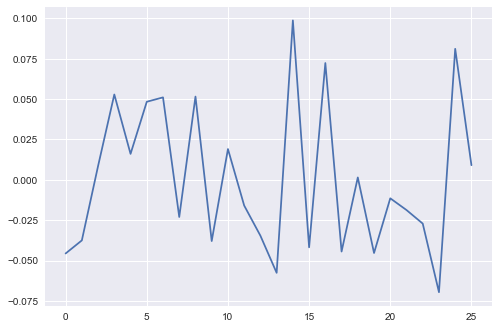

In [42]:
res=model.resid

plt.plot(res)

C:\Users\ezely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


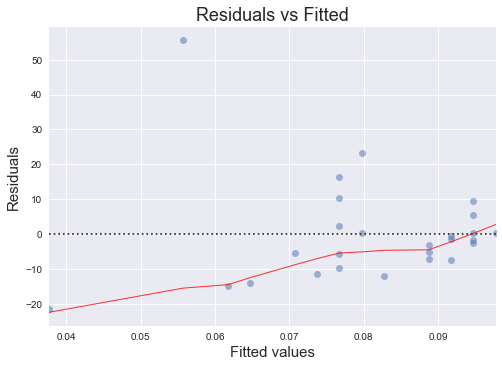

In [40]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

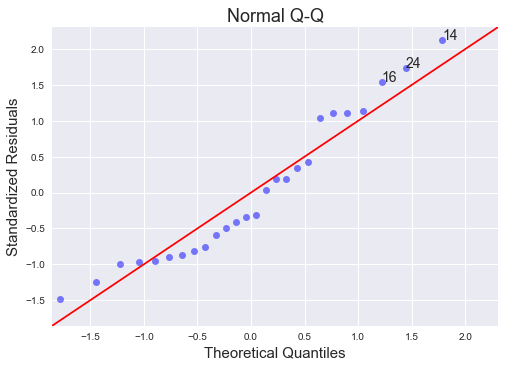

In [41]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [57]:
XX = dY[["Air Pollution (micro grams per cubic meter)","Life expectancy"]]
yy = dY[["FCFR"]]

In [58]:
model2 = ols("yy ~ XX", dataframe).fit()
predictions = model2.predict(FCFRs) # make the predictions by the model

# Print out the statistics
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yy   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     5.391
Date:                Sun, 13 Jun 2021   Prob (F-statistic):             0.0120
Time:                        15:30:03   Log-Likelihood:                -25.968
No. Observations:                  26   AIC:                             57.94
Df Residuals:                      23   BIC:                             61.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2562      2.759     -1.543      0.1

C:\Users\ezely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


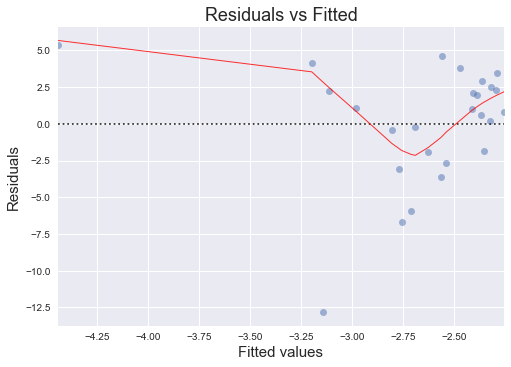

In [59]:
model2_fitted_y = model2.fittedvalues
# model residuals
model2_residuals = model2.resid
# normalized residuals
model2_norm_residuals = model2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model2_norm_residuals_abs_sqrt = np.sqrt(np.abs(model2_norm_residuals))
# absolute residuals
model2_abs_resid = np.abs(model2_residuals)
# leverage, from statsmodels internals
model2_leverage = model2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model2_cooks = model2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model2_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

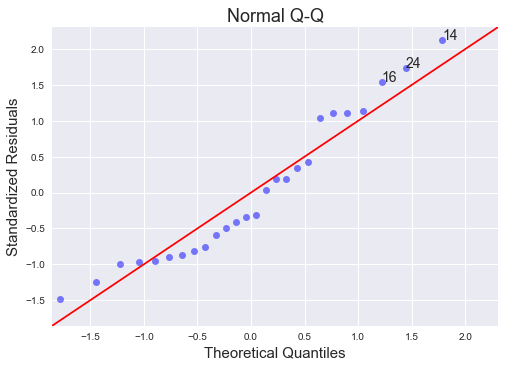

In [60]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [61]:
XX = dY[["Air Pollution (micro grams per cubic meter)","Life expectancy", "CVD"]]
yy = dY[["FCFR"]]

In [62]:
model2 = ols("yy ~ XX", dataframe).fit()
predictions = model2.predict(FCFRs) # make the predictions by the model

# Print out the statistics
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yy   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5.924
Date:                Sun, 13 Jun 2021   Prob (F-statistic):            0.00402
Time:                        15:30:55   Log-Likelihood:                -23.268
No. Observations:                  26   AIC:                             54.54
Df Residuals:                      22   BIC:                             59.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3931      4.604      0.954      0.3

C:\Users\ezely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


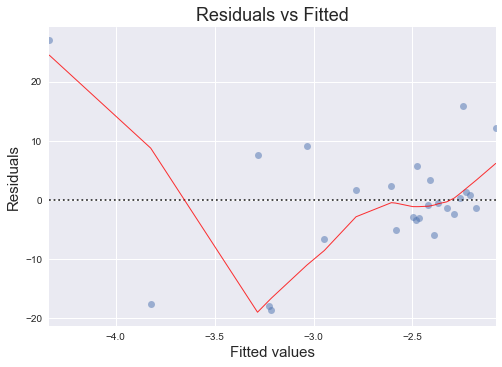

In [63]:
model2_fitted_y = model2.fittedvalues
# model residuals
model2_residuals = model2.resid
# normalized residuals
model2_norm_residuals = model2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model2_norm_residuals_abs_sqrt = np.sqrt(np.abs(model2_norm_residuals))
# absolute residuals
model2_abs_resid = np.abs(model2_residuals)
# leverage, from statsmodels internals
model2_leverage = model2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model2_cooks = model2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model2_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

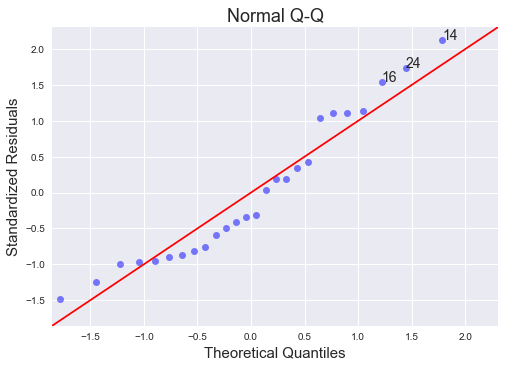

In [64]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));